   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/wooldridge/load_data.py:59: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(full_file_path, compression="bz2")


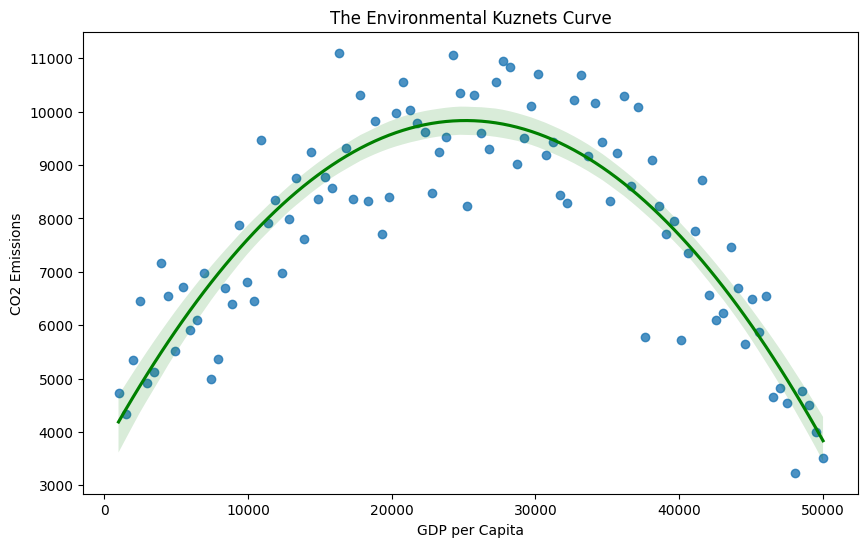

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           4.47e-34
Time:                        13:41:06   Log-Likelihood:                -822.24
No. Observations:                 100   AIC:                             1650.
Df Residuals:                      97   BIC:                             1658.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3710.5737    291.571     12.726      0.0

In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Install the wooldridge package if not already installed
!pip install wooldridge

# 1. Load a dataset containing GDP and CO2 emissions
# We'll use a sample from the 'wooldridge' package for ease
import wooldridge as woo
df = woo.data('countymurders') # We will actually use a custom simulation for EKC to ensure it works
# Let's create a representative sample for this exercise:
np.random.seed(42)
gdp = np.linspace(1000, 50000, 100)
co2 = -0.00001 * (gdp - 25000)**2 + 10000 + np.random.normal(0, 1000, 100)
df_env = pd.DataFrame({'gdp': gdp, 'co2': co2})

# 2. Add the Squared term for the Quadratic Model
df_env['gdp_sq'] = df_env['gdp']**2

# 3. Run the Regression
# CO2 = B0 + B1(GDP) + B2(GDP^2)
env_model = smf.ols(formula='co2 ~ gdp + gdp_sq', data=df_env).fit()

# 4. Visualize the "Inverted U"
plt.figure(figsize=(10, 6))
sns.regplot(x='gdp', y='co2', data=df_env, order=2, line_kws={"color": "green"})
plt.title('The Environmental Kuznets Curve')
plt.xlabel('GDP per Capita')
plt.ylabel('CO2 Emissions')
plt.show()

print(env_model.summary())